In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})
df['Churn'].value_counts()


Churn
0    5174
1    1869
Name: count, dtype: int64

In [4]:
df['TotalCharges'].dtype


dtype('O')

In [5]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'].isnull().sum()


np.int64(11)

In [6]:
df['TotalCharges'] = df['TotalCharges'].fillna(0)
df['TotalCharges'].isnull().sum()


np.int64(0)

In [7]:
df_model = df[['tenure', 'MonthlyCharges', 'TotalCharges', 'Contract', 'PaymentMethod', 'Churn']]
df_model.head()


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,1,29.85,29.85,Month-to-month,Electronic check,0
1,34,56.95,1889.50,One year,Mailed check,0
2,2,53.85,108.15,Month-to-month,Mailed check,1
3,45,42.30,1840.75,One year,Bank transfer (automatic),0
4,2,70.70,151.65,Month-to-month,Electronic check,1


In [9]:
le = LabelEncoder()

df_model.loc[:, 'Contract'] = le.fit_transform(df_model['Contract'])
df_model.loc[:, 'PaymentMethod'] = le.fit_transform(df_model['PaymentMethod'])


In [10]:
df_model.head()


,tenure,MonthlyCharges,TotalCharges,Contract,PaymentMethod,Churn
0,1,29.85,29.85,0,2,0
1,34,56.95,1889.50,1,3,0
2,2,53.85,108.15,0,3,1
3,45,42.30,1840.75,1,0,0
4,2,70.70,151.65,0,2,1


In [11]:
X = df_model.drop('Churn', axis=1)  # input features
y = df_model['Churn']               # target

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)


In [12]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy


0.8005677785663591

In [ ]:
#DATA VISUALIZATION

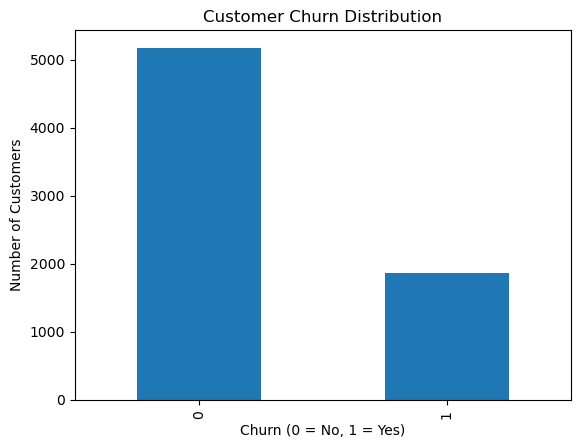

In [13]:
import matplotlib.pyplot as plt

df['Churn'].value_counts().plot(kind='bar')
plt.title("Customer Churn Distribution") #HOW MANY CUSTOMERS STAYED
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Number of Customers")
plt.show()


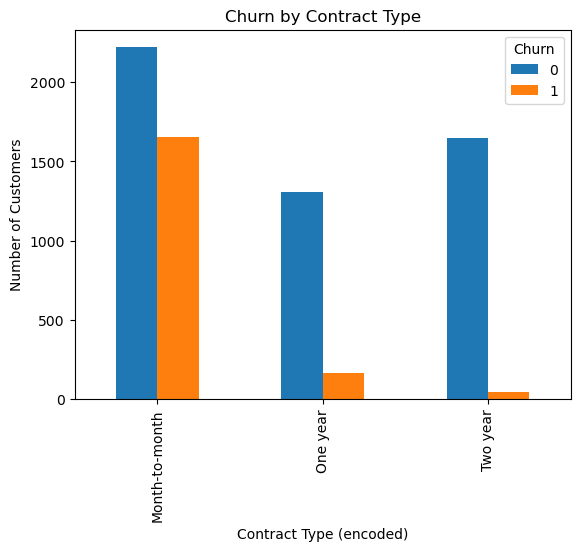

In [14]:
#Does contract type affect churn?
pd.crosstab(df['Contract'], df['Churn']).plot(kind='bar')
plt.title("Churn by Contract Type")
plt.xlabel("Contract Type (encoded)")
plt.ylabel("Number of Customers")
plt.show()


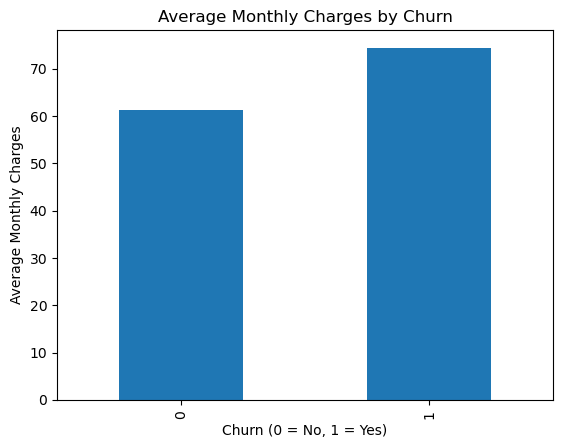

In [15]:
#Do customers with higher bills churn more?
df.groupby('Churn')['MonthlyCharges'].mean().plot(kind='bar')
plt.title("Average Monthly Charges by Churn")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Average Monthly Charges")
plt.show()


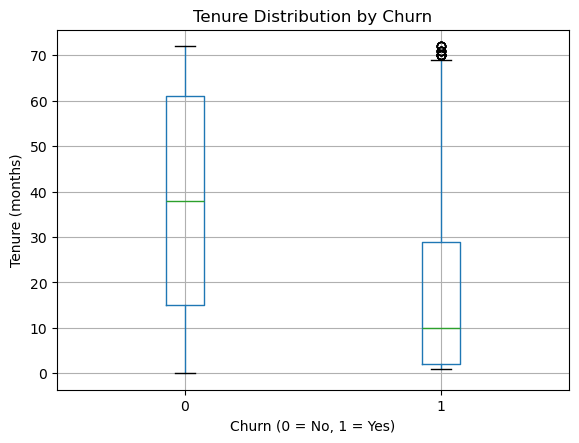

In [16]:
df.boxplot(column='tenure', by='Churn')
plt.title("Tenure Distribution by Churn")
plt.suptitle("")
plt.xlabel("Churn (0 = No, 1 = Yes)")
plt.ylabel("Tenure (months)")
plt.show()
